<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predict wine quality based on the given physicochemical tests.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = http://bit.ly/WineQualityDatasetSource
# ---
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
wine = pd.read_csv('/content/winequality-red (1).csv')

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5




## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
wine.shape

(1599, 12)

In [ ]:
# Previewing the top of our dataset
#
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Previewing the bottom of our dataset
# 
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# Checking whether each column has an appropriate datatype
#
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

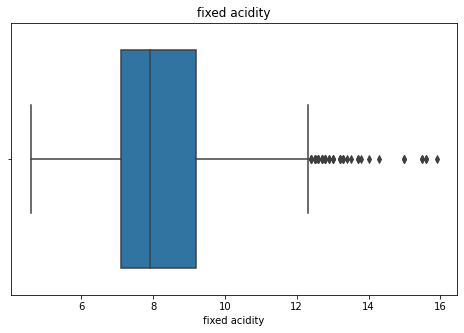

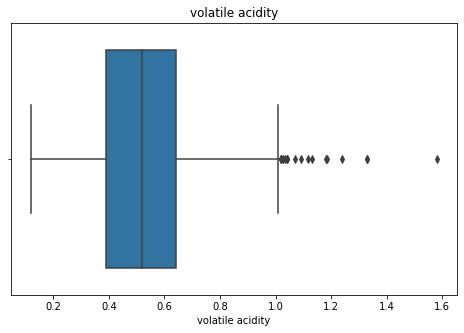

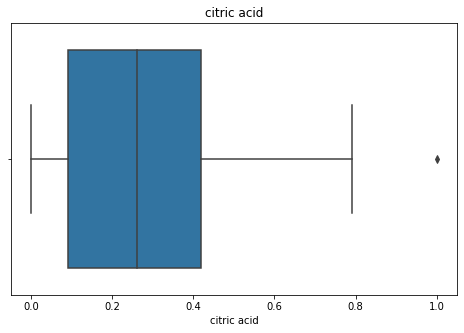

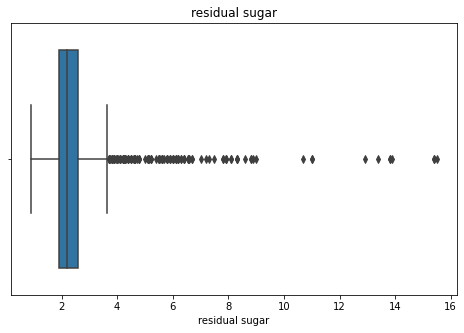

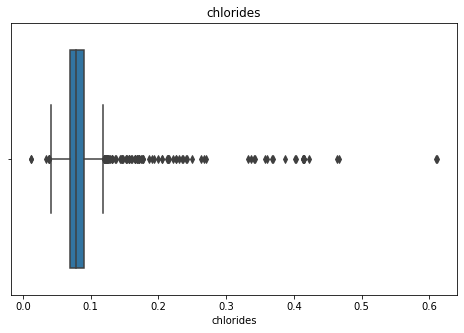

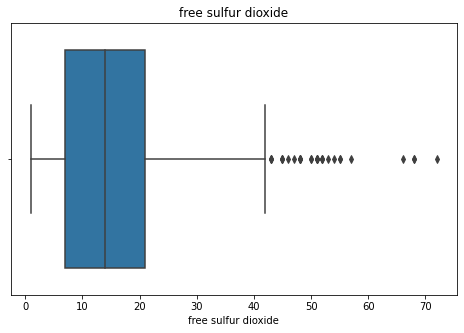

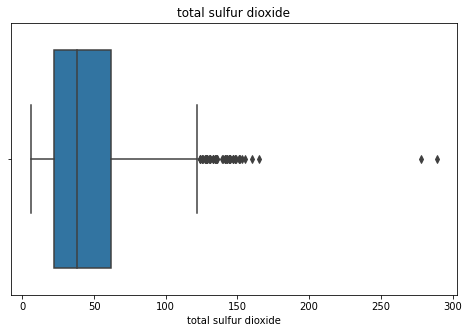

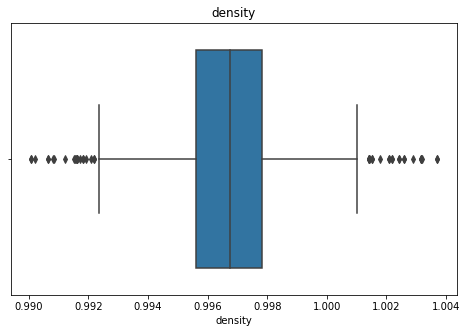

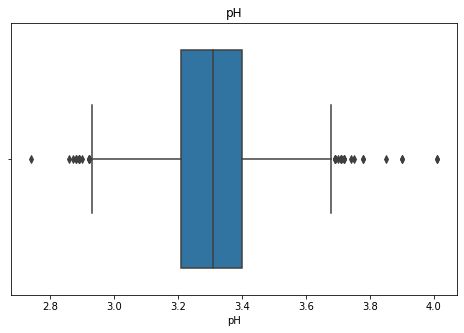

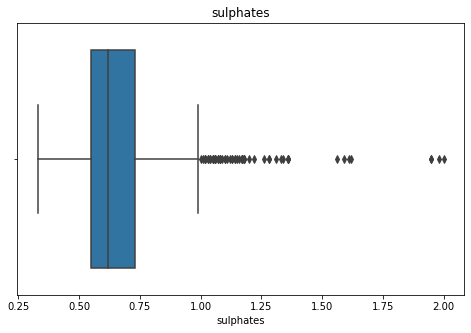

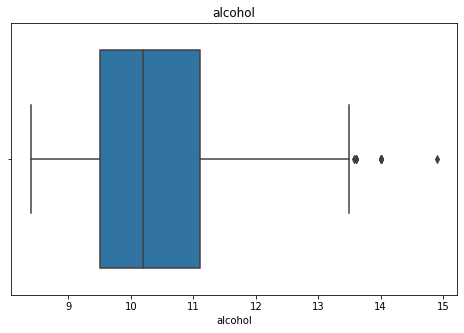

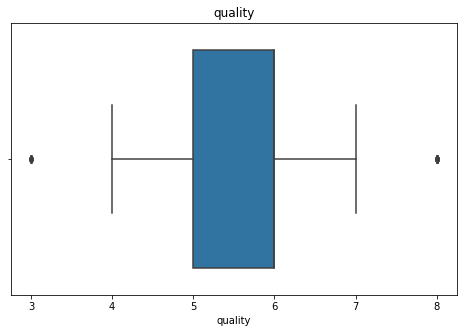

In [ ]:
# Checking for Outliers

columns =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i, j in enumerate(columns):
  plt.figure(figsize=(8,5))
  plt.title(j)
  sns.boxplot(wine[j])
 

In [ ]:
# Checking for Anomalies
#

In [ ]:
# Identifying the Missing Data
#
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Dealing with the Missing Data
#
wine.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# More data cleaning procedures
#

## 6. Exploratory Analysis

In [ ]:
# Ploting the bivariate summaries and recording our observations
#
corr = wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


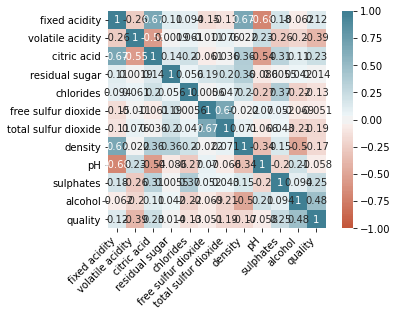

In [ ]:
corr = wine.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# Data Reduction


In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
X = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values
y = wine['quality'].values

In [ ]:
#divides data into training and test sets#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
 #Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following code
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance 
# of our classifier with a single linear discriminant. 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.
# Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV

search = GridSearchCV(clf, param_grid= {'n_neighbors': np.arange(1,30, 2)}, n_jobs= 1, refit=True, cv = 5)

In [ ]:
search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
search.best_params_

{'n_neighbors': 23}

In [ ]:
clf = KNeighborsClassifier(n_neighbors=23)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
confusion = pd.DataFrame({'Actual': y_test.flatten(), 'Predict': y_pred.flatten()})


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   7,   3,   1,   0],
       [  0,   0, 108,  27,   0,   0],
       [  0,   0,  50,  77,  15,   0],
       [  0,   0,   2,  16,   9,   0],
       [  0,   0,   0,   1,   2,   0]])

In [ ]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.64      0.80      0.71       135
           6       0.62      0.54      0.58       142
           7       0.33      0.33      0.33        27
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.27      0.28      0.27       320
weighted avg       0.57      0.61      0.58       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 8. Implementing the Solution using KNN method

In [1]:
# Implementing the Solution
#Loaded the dependencies again
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **1.Read the Data again**

In [3]:
df = pd.read_csv('/content/winequality-red (1).csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.duplicated().sum()

240

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### **2.Standardise the Variables**

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('quality',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_features = scaler.transform(df.drop('quality',axis=1))

In [11]:
scaled_features

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [13]:
df_feat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


### **3. KNN Algorithms**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df_feat
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

### **4.Using KNN**
Remember that we are trying to come up with a model to predict the quality of wine We’ll start with k=1.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
#when K =1
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
pred = knn.predict(X_test)

In [21]:
pred

array([6, 6, 6, 7, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 4, 7, 5, 5,
       5, 5, 7, 6, 5, 5, 6, 5, 6, 7, 6, 6, 6, 7, 6, 7, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 4, 5, 6, 6, 6, 6, 7, 5, 6, 6, 5, 5, 5, 7, 7, 6, 5,
       6, 6, 6, 6, 6, 5, 4, 7, 5, 5, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5,
       5, 6, 7, 6, 5, 7, 5, 5, 6, 5, 5, 6, 5, 5, 7, 6, 7, 5, 6, 6, 6, 6,
       6, 8, 7, 7, 6, 7, 5, 5, 6, 6, 7, 7, 5, 6, 6, 6, 5, 5, 5, 6, 6, 4,
       6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 7, 7, 5, 5, 6, 5, 5, 5,
       5, 6, 5, 5, 6, 5, 5, 7, 7, 6, 6, 6, 5, 5, 4, 5, 7, 5, 5, 5, 6, 7,
       6, 5, 6, 7, 7, 6, 6, 6, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 4, 6, 5, 6, 7, 6, 6, 5, 6, 5, 4, 6, 5, 6, 7, 5, 7,
       7, 6, 5, 6, 5, 6, 6, 7, 5, 6, 5, 5, 6, 7, 6, 6, 5, 5, 6, 6, 6, 4,
       5, 6, 5, 7, 6, 4, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 7, 7,
       6, 5, 5, 7, 5, 6, 6, 4, 6, 4, 5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 7,
       6, 6, 6, 7, 6, 3, 5, 6, 6, 6, 7, 8, 6, 6, 5,

### 5.Predictions and Evaluations

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0  2  1  0  0  0]
 [ 1  1  5  6  0  0]
 [ 0  8 95 35  5  0]
 [ 0  1 26 75 18  0]
 [ 0  0  2 12 21  1]
 [ 0  0  0  1  3  1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.08      0.08      0.08        13
           5       0.74      0.66      0.70       143
           6       0.58      0.62      0.60       120
           7       0.45      0.58      0.51        36
           8       0.50      0.20      0.29         5

    accuracy                           0.60       320
   macro avg       0.39      0.36      0.36       320
weighted avg       0.61      0.60      0.60       320



### **6.Choosing a K Value – Elbow method**

In [30]:
error_rate=[]

# check all possible error values from k=1 to k=40 and plug the output into the empty array error_rate
#for i in range(1,30):
#    knn = KNeighborsClassifier(n_neighbors=i)
#    knn.fit(X_train,y_train)
#    pred_i = knn.predict(X_test)
#    error_rate.append(np.mean(pred_i != y_test))

In [38]:
from sklearn.model_selection import cross_val_score
error_rate = []
for i in range(1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn,df_feat,df['quality'], cv= 10)
  error_rate.append(1 - score.mean())

Text(0, 0.5, 'Error Rate')

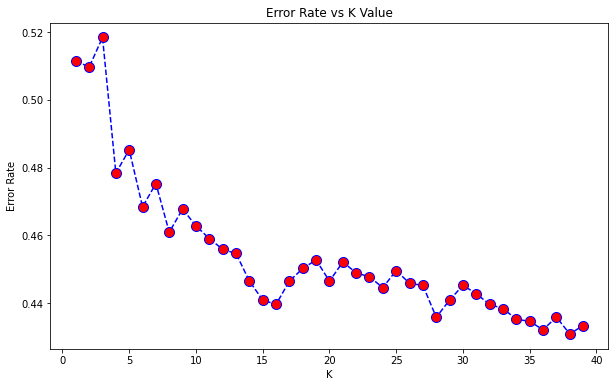

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
#Our original k=1 results
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 0  2  1  0  0  0]
 [ 1  1  5  6  0  0]
 [ 0  8 95 35  5  0]
 [ 0  1 26 75 18  0]
 [ 0  0  2 12 21  1]
 [ 0  0  0  1  3  1]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.08      0.08      0.08        13
           5       0.74      0.66      0.70       143
           6       0.58      0.62      0.60       120
           7       0.45      0.58      0.51        36
           8       0.50      0.20      0.29         5

    accuracy                           0.60       320
   macro avg       0.39      0.36      0.36       320
weighted avg       0.61      0.60      0.60       320



In [42]:
# vs k = 27
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=27


[[  0   0   2   1   0   0]
 [  0   0   8   5   0   0]
 [  0   0 109  34   0   0]
 [  0   0  44  67   9   0]
 [  0   0   4  21  11   0]
 [  0   0   0   3   2   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.65      0.76      0.70       143
           6       0.51      0.56      0.53       120
           7       0.50      0.31      0.38        36
           8       0.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.28      0.27      0.27       320
weighted avg       0.54      0.58      0.56       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#Find a better algorithm to perform the following for the accuracy improvement.

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

In [ ]:
#Sure  the data was quite fine

### b). Do we need other data to answer our question?

In [ ]:
#I guess not

### c). Did we have the right question?

In [ ]:
#Yes